## Activity 8: Handling Outliers and Missing Data

### Step one: Read the Visit_data.csv file

In [1]:
# First I will import matplotlib, numpy, and pandas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Next I will import the data and view it
Visit_data = pd.read_csv("visit_data.csv")
Visit_data

,id,first_name,last_name,email,gender,ip_address,visit
0,1,Sonny,Dahl,sdahl0@mysql.com,Male,135.36.96.183,1225.0
1,2,NaN,NaN,dhoovart1@hud.gov,NaN,237.165.194.143,919.0
2,3,Gar,Armal,garmal2@technorati.com,NaN,166.43.137.224,271.0
3,4,Chiarra,Nulty,cnulty3@newyorker.com,NaN,139.98.137.108,1002.0
4,5,NaN,NaN,sleaver4@elegantthemes.com,NaN,46.117.117.27,2434.0
...,...,...,...,...,...,...,...
995,996,Averil,Pickover,apickoverrn@vk.com,Male,10.45.16.167,1305.0
996,997,Walton,Hallewell,whallewellro@nasa.gov,NaN,231.224.238.232,2531.0
997,998,NaN,NaN,ggallamorerp@meetup.com,Female,118.65.94.40,NaN
998,999,Sapphira,Terron,sterronrq@wordpress.org,NaN,24.77.234.208,250.0


### Step two: Check for duplicates

In [4]:
# I will search and see if any of the columns have duplicate data 
# by using the format and duplicate function to state if the request is true or false
print("Is the 'id' duplictaed: {}".format(any(Visit_data.id.duplicated())))
print("Is the 'First name' duplictaed: {}".format(any(Visit_data.first_name.duplicated())))
print("Is the 'Last name' duplictaed: {}".format(any(Visit_data.last_name.duplicated())))
print("Is the 'Email' duplictaed: {}".format(any(Visit_data.email.duplicated())))
print("Is the 'ip_address' duplictaed: {}".format(any(Visit_data.ip_address.duplicated())))

Is the 'id' duplictaed: False
Is the 'First name' duplictaed: True
Is the 'Last name' duplictaed: True
Is the 'Email' duplictaed: False
Is the 'ip_address' duplictaed: False


### Step three: Check if any essential column contains NaN. 

In [11]:
# Next I will check and see if any of the essential columns conatin NaNs
# by using the % operator
print("Does the 'id'column contains NaN: %r " % Visit_data.email.isnull().values.any())
print("Does the 'Email' column contains NaN: %r " % Visit_data.email.isnull().values.any())
print("Does the 'IP Address' column contains NaN: %r " % Visit_data.ip_address.isnull().values.any())
print("Does the 'Visit' column contains NaN: %r " % Visit_data.visit.isnull().values.any())

Does the 'id'column contains NaN: False 
Does the 'Email' column contains NaN: False 
Does the 'IP Address' column contains NaN: False 
Does the 'Visit' column contains NaN: True 


### Step four: Get rid of the outliers.

In [12]:
# I will use the shape function on the data frame to get rid of 
# outliers and create a new data frame
orig_data = Visit_data.shape
updated_Visit_data = Visit_data[np.isfinite(Visit_data['visit'])]
new_data = updated_Visit_data.shape

### Step five: Report the size difference

In [16]:
# Next I will print the size difference for the original data and 
# new data after the outliers have been removed by using the format
# function and prev and after. 
print("The original data was: {prev[0]} rows".format(prev=orig_data))
print("The new data is: {after[0]} rows".format(after=new_data))

The original data was: 1000 rows
The new data is: 974 rows


### Step six: Create a box plot to check for outliers

{'whiskers': [<matplotlib.lines.Line2D at 0x7fe720443a00>,
 'caps': [<matplotlib.lines.Line2D at 0x7fe720453130>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fe7204436a0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fe7204537f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fe720453b50>],
 'means': []}

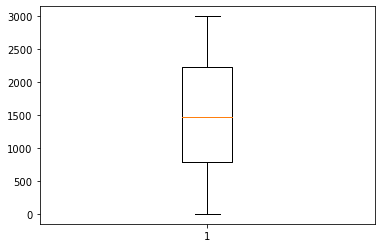

In [18]:
# I will use the matplot to crate a box plot to check for outliers
plt.boxplot(updated_Visit_data.visit)

As seen above in the box plot our data is estimated to be between 750 and 2,250. Which tells us that any data out of this area could be an outlier. 

### Step seven: Get rid of any outliers

In [20]:
# After viewing the box plot I have determined to get rid of 
# outliers that are greater than 2,800 and lower than 250
new_Visit_data = updated_Visit_data[(updated_Visit_data['visit'] <= 2800) & (updated_Visit_data['visit'] >= 250)]
# Last I will print the update amount of data in the data frame
print("New Visit Data without outliers is: {}".format(*new_Visit_data.shape))

New Visit Data without outliers: 849
